# Understanding the Eniac's Dataset

## DataFrames

### orders.csv


---


Every row in this file represents an order.
* **order_id**: a unique identifier for each order
* **created_date**: a timestamp for when the order was created
* **total_paid**: the total amount paid by the customer for this order, in euros
state
* **Shopping basket**: products have been placed in the shopping basket
* **Place Order**: the order has been placed, but is awaiting shipment details
* **Pending**: the order is awaiting payment confirmation
* **Completed**: the order has been placed and paid, and the transaction is completed.
* **Cancelled**: the order has been cancelled and the payment returned to the customer.

### products.csv

---


* **sku**: stock keeping unit: a unique identifier for each product
* **name**: product name
* **desc**: product description
* **price**: base price of the product, in euros
* **promo_price**: promotional price, in euros
* **in_stock**: whether or not the product was in stock at the moment of the data extraction
* **type**: a numerical code for product type

### orderlines.csv

---


Every row represents each one of the different products involved in an order.
* **id**: a unique identifier for each row in this file
* **id_order**: corresponds to orders.order_id
* **product_id**: an old identifier for each product, nowadays not in use
* **product_quantity**: how many units of that product were purchased on that order
* **sku**: stock keeping unit: a unique identifier for each product
* **unit_price**: the unitary price (in euros) of each product at the moment of placing that order
* **date**: timestamp for the processing of that product

### brands.csv

---


* **short**: the 3-character code by which the brand can be identified in the first 3 characters of products.sku
* **long**: brand name

## Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading Datasets

In [ ]:
def read_csv_from_url(url):
  path = "https://drive.google.com/uc?export=download&id=" + url.split("/")[-2]
  return pd.read_csv(path)

orders_url = "https://drive.google.com/file/d/1Zy3WJwSP5cwJheSY6TVDjT7jvvpgaYfd/view?usp=share_link"
orderlines_url = "https://drive.google.com/file/d/1wHAFzayr-jS2QGFgw2YAalJcsrrv4_pz/view?usp=share_link"
products_url = "https://drive.google.com/file/d/1SD4NZ14BLCvrdKZE8NNZn54z9STZdKG8/view?usp=share_link"
brands_url = "https://drive.google.com/file/d/1XkbRqwx6IvOpWC3Wjm8Goep9vZTPNPcZ/view?usp=share_link"

orders_df = read_csv_from_url(orders_url)
orderlines_df = read_csv_from_url(orderlines_url)
products_df = read_csv_from_url(products_url)
brands_df = read_csv_from_url(brands_url)

## Some General Functions

In [ ]:
def object_to_float(x):
    parts = x.split('.')
    if len(parts) > 2:
        # remove the first '.', remain last one
        return float(''.join(parts[:-1]) + '.' + parts[-1])
    else:
        return float(x)

In [ ]:
def hist_without_outliers(serie):
  upper_limit = serie.quantile(0.95)
  filtered_serie = serie[serie <= upper_limit]
  filtered_serie.hist(bins=20)

## Check DataFrames

### Understanding Orders DataFrame

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [ ]:
orders_df.describe()

,order_id,total_paid
count,226909.000000,226904.000000
mean,413296.482480,569.225818
std,65919.250331,1761.778002
min,241319.000000,0.000000
25%,356263.000000,34.190000
50%,413040.000000,112.990000
75%,470553.000000,525.980000
max,527401.000000,214747.530000


In [ ]:
orders_df.isna().any()

,0
order_id,False
created_date,False
total_paid,True
state,False


In [ ]:
orders_df.isna().sum()

,0
order_id,0
created_date,0
total_paid,5
state,0


In [ ]:
orders_df['state'].value_counts(normalize=True)

,proportion
state,
Shopping Basket,0.519191
Completed,0.205391
Place Order,0.180174
Pending,0.063369
Cancelled,0.031876


In [ ]:
pd.to_datetime(orders_df['created_date']).dt.month.value_counts()

,count
created_date,
1,43979
11,31779
2,27998
12,25167
3,18985
7,13829
10,13798
9,11533
8,10347


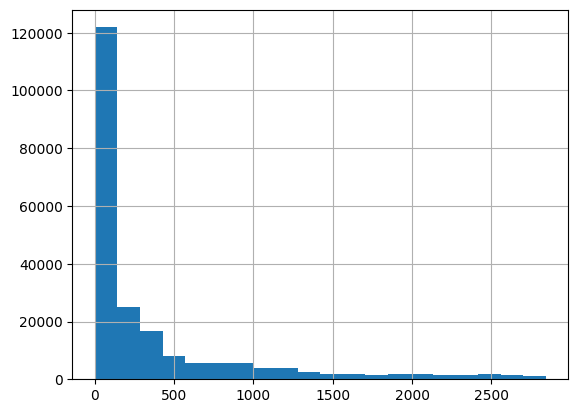

In [ ]:
hist_without_outliers(orders_df["total_paid"])

* There are 226909 data in orders_df and 4 attributes.
* There are 5 null values in total_paid attribute.
* "created_date" is object but it should be datetime.
* "total_paid" is seen as float but it has some invalid format like "26.9459.00".
* The half of the orders are still inside the "shopping basket".

### Understanding Orderlines DataFrame

In [ ]:
orderlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [ ]:
orderlines_df.describe()

,id,id_order,product_id,product_quantity
count,2.939830e+05,293983.000000,293983.0,293983.000000
mean,1.397918e+06,419999.116544,0.0,1.121126
std,1.530096e+05,66344.486479,0.0,3.396569
min,1.119109e+06,241319.000000,0.0,1.000000
25%,1.262542e+06,362258.500000,0.0,1.000000
50%,1.406940e+06,425956.000000,0.0,1.000000
75%,1.531322e+06,478657.000000,0.0,1.000000
max,1.650203e+06,527401.000000,0.0,999.000000


In [ ]:
orderlines_df.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


In [ ]:
orderlines_df.isna().any()

,0
id,False
id_order,False
product_id,False
product_quantity,False
sku,False
unit_price,False
date,False


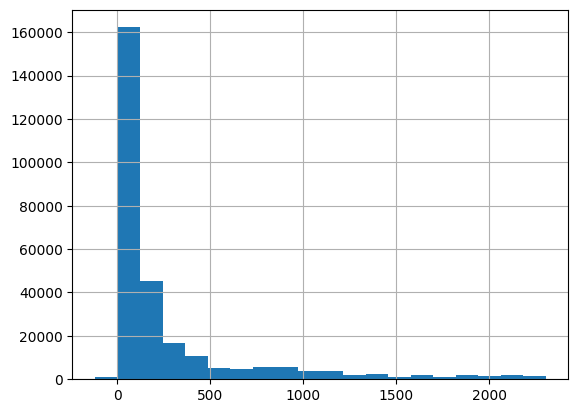

In [ ]:
hist_without_outliers(orderlines_df['unit_price'].apply(object_to_float))

In [ ]:
float_unit_price = orderlines_df['unit_price'].apply(object_to_float)
upper_unit_price = float_unit_price.quantile(0.95)

def unit_price_to_category(unit_price):
  if unit_price < 0:
    return "Negative"
  elif unit_price > upper_unit_price:
    return "Outlier"
  else:
    return "Normal"

float_unit_price.apply(unit_price_to_category).value_counts()

,count
unit_price,
Normal,279289
Outlier,14693
Negative,1


* There are 293983 data with 7 different attributes.
* None of the columns has null value.
* "unit_price" should be float but it is object.
* "date" is object bu it should be datetime.
* Some product's "product_quantity" is so high like 999.
* There is one negative unit price and too many outliers.


### Understranding Product DataFrame

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [ ]:
products_df.head()

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


* There are 19326 data with 7 different atributes.
* "desc", "price", "type" have null values.
* "price" and "promo_price" is a object type but it should be float.
* "in_stock" is int but maybe boolean type is better for it.

### Understanding Brands DataFrame

In [ ]:
brands_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [ ]:
brands_df.head()

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio


* There are 187 data with 2 different attributes.
* There are not null values.